In [1]:
from auto_segment_EG import BasicSegmenterEG
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
import pandas as pd
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [12]:
import auto_segment_EG
reload(auto_segment_EG)

<module 'auto_segment_EG' from 'auto_segment_EG.py'>

In [39]:
mdl = auto_segment_EG.BasicSegmenterEG()

In [41]:
mdl = mdl.set_params(**{'cxpb': 0.5,
 'indpb': 0.2,
 'init_sample_percentage': None,
 'mutpb': 0.5,
 'n': 10,
 'n_population': 20,
 'ngen': 10,
#  'statistics': True,
 'test_size': 0.25,
 'tournsize': 3,
 'base_estimator': LinearRegression(),
 'n_votes' : 10
                 })

In [33]:
grid = {
#  'indpb':[0.1, 0.3, 0.5, 0.7],
#  'init_sample_percentage': [ 0.1, 0.3, 0.5, 0.7, 0.9],
 'n_votes': [1,3,5,7,9],
    'n' : [3,5, 20, 30]
 }

In [34]:
# mdl = BasicSegmenterEG()
clf = RandomizedSearchCV(mdl, grid, scoring = 'mean_squared_error', verbose=True, cv = 2, n_iter=30)
# RandomizedSearchCV?

In [41]:
df = pd.read_csv('ameo_numerical.csv')
x_columns = list(set(df.columns) - set(['Salary']) - set(['Degree_M.Sc. (Tech.)']))
y_column = 'Salary'
X = df[x_columns]
y = df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [36]:
print clf
clf.fit(X, y)

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   24.9s
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed: 24.8min


RandomizedSearchCV(cv=2, error_score='raise',
          estimator=BasicSegmenterEG(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
         crossover_func=<function cxTwoPoint at 0x10E4C8B0>, cxpb=0.5,
         indpb=0.2, init_sample_percentage=0.2, mutpb=0.5, n=10,
         n_population=20, n_votes=1, ngen=10, statistics=None,
         test_size=0.25, tournsize=3),
          fit_params={}, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'n_votes': [1, 3, 5, 7, 9], 'init_sample_percentage': [0.1, 0.3, 0.5, 0.7, 0.9], 'n': [3, 5, 20, 30]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='mean_squared_error', verbose=True)
Fitting 2 folds for each of 30 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 28.5min finished


RandomizedSearchCV(cv=2, error_score='raise',
          estimator=BasicSegmenterEG(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
         crossover_func=<function cxTwoPoint at 0x10E4C8B0>, cxpb=0.5,
         indpb=0.2, init_sample_percentage=0.2, mutpb=0.5, n=10,
         n_population=20, n_votes=1, ngen=10, statistics=None,
         test_size=0.25, tournsize=3),
          fit_params={}, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'n_votes': [1, 3, 5, 7, 9], 'init_sample_percentage': [0.1, 0.3, 0.5, 0.7, 0.9], 'n': [3, 5, 20, 30]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='mean_squared_error', verbose=True)

In [25]:
clf.best_score_
from sklearn.metrics import mean_squared_error
clf.best_estimator_.score(X, y)
import numpy as np
np.sqrt(mean_squared_error(clf.best_estimator_.predict(X), y))
clf.best_estimator_.n_votes

1

In [5]:
def ameo_leaderboard(estimator):
    global x_columns, y_column
    unseen = pd.read_csv('ameo_numerical_test.csv')
    unseen.Domain = unseen.Domain.fillna(unseen.Domain.mean())

    unseen_x = unseen[x_columns]

    # shady
#     unseen_x = (unseen_x - df[x_columns].mean())/df[x_columns].std()


    submission = pd.DataFrame()
    submission['ID'] = unseen.ID
#     print unseen.ID
#     print x_columns
    preds =  estimator.predict(unseen_x)
#     print preds
    submission['Salary'] = preds
    return submission

In [52]:
# sub = pd.read_clipboard()
sub = ameo_leaderboard(nmdl)
sub.loc[sub.Salary<0, 'Salary'] = 300000
# print sub
# sub.to_csv('gridcv_mdl_ngen_30.csv', index=False)
bench = pd.merge(unseen_true, sub, on='ID', how='left')
np.sqrt(mean_squared_error(bench.Salary_x, bench.Salary_y))
#base at ngen 30: 198799


200808.34288714771

In [20]:
sub = pd.read_clipboard()
# sub = ameo_leaderboard(nmdl2)
# print sub
# sub.to_csv('gridcv_mdl_ngen_30.csv', index=False)
bench = pd.merge(unseen_true, sub, on='ID', how='left')
np.sqrt(mean_squared_error(bench.Salary_x, bench.Salary_y))

201754.70471988607

-173137.280564 758956.541079
-100884.862041 703684.20948
-3.62403626844e+19 723778.193378
-2.8120500284e+19 705037.577992
-2.33944508377e+19 719488.146062
-1.94953756981e+19 730268.09526
-1.67103220269e+19 723775.920937
-1.46215317736e+19 718112.646521


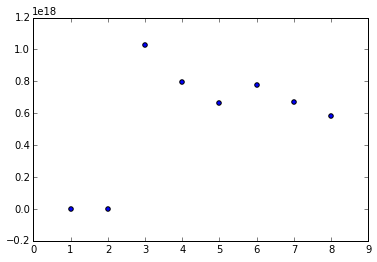

In [58]:
x = []
y = []
import matplotlib.pyplot as plt
%matplotlib inline
for i in range (1,9):
    x.append(i)
    sub = ameo_leaderboard(nmdl.set_params(**{'n_votes' : i}))
    print sub.Salary.min(), sub.Salary.max()
    bench = pd.merge(unseen_true, sub, on='ID', how='left')
    y_ = np.sqrt(mean_squared_error(bench.Salary_x, bench.Salary_y))
    y.append(y_)
    
plt.scatter(x, y)
# plt.title('BasicSegmenter trained on 10 votes, but predicted on 1 to 10 votes')

In [151]:
X['Degree_M.Sc. (Tech.)'].unique()

array([0, 1], dtype=int64)

In [154]:
pd.np.isfinite([0,0,0])

array([ True,  True,  True], dtype=bool)

In [62]:
best_params = clf.best_estimator_.get_params()

In [38]:
nmdl = auto_segment_EG.BasicSegmenterEG()
nmdl.set_params(**{'cxpb': 0.5,
 'indpb': 0.2,
 'init_sample_percentage': 0.5,
 'mutpb': 0.5,
 'n': 10,
 'n_population': 20,
 'ngen': 100,
 'statistics': True,
 'test_size': 0.25,
 'tournsize': 3,
 'base_estimator': LinearRegression(),
 'n_votes' : 10})
# nmdl.ngen = 200
nmdl.statistics = True

In [63]:
from sklearn.ensemble import BaggingRegressor
# nmdl.base_estimator
Perceptron?

In [39]:
nmdl.fit(X, y)
# nmdl2 = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=10, oob_score=True).fit(X, y)

gen	nevals	avg   	std   	min   	max   
0  	20    	257371	396.43	256631	258178
1  	16    	257018	266.191	256573	257518
2  	14    	256826	194.308	256573	257305
3  	14    	256687	197.454	256189	257230
4  	15    	256583	199.377	256189	256967
5  	15    	256483	180.189	256189	256836
6  	15    	256379	137.236	256189	256693
7  	19    	256267	111.883	256021	256499
8  	11    	256198	82.4709	256021	256370
9  	11    	256142	52.05  	256021	256197
10 	16    	256107	103.643	255910	256320
11 	15    	256036	105.777	255859	256200
12 	13    	255963	90.9755	255829	256126
13 	17    	255922	101.315	255758	256182
14 	15    	255848	130.793	255588	256122
15 	16    	255762	146.59 	255483	256031
16 	12    	255633	148.386	255483	256093
17 	16    	255567	96.867 	255397	255833
18 	15    	255532	68.2831	255397	255705
19 	19    	255485	92.8203	255370	255724
20 	12    	255474	99.3321	255346	255743
21 	15    	255421	63.0921	255299	255550
22 	13    	255395	73.7582	255246	255545
23 	15    	255334	63.3125	255223	255511
24

BasicSegmenterEG(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
         crossover_func=<function cxTwoPoint at 0x1178E8F0>, cxpb=0.5,
         indpb=0.2, init_sample_percentage=0.5, mutpb=0.5, n=10,
         n_population=20, n_votes=10, ngen=100, statistics=True,
         test_size=0.25, tournsize=3)

In [17]:
unseen_true = pd.read_clipboard()

In [3]:
print unseen_true.shape
print sub.shape

(1250, 2)


NameError: name 'sub' is not defined

In [77]:
bench = pd.merge(unseen_true, sub, on='ID', how='left')
np.sqrt(mean_squared_error(bench.Salary_x, bench.Salary_y))

3.2497869618255136e+17

In [22]:
nmdl.base_estimator

sklearn.linear_model.coordinate_descent.LassoCV

In [45]:
from sklearn.linear_model import LinearRegression
nmdl = LinearRegression()
nmdl.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
np.sqrt(mean_squared_error(nmdl.predict(X_test),y_test))

2465993.0031089578

In [49]:
np.sqrt(mean_squared_error(nmdl.predict(X_train),y_train))

178549.85883098908

In [27]:
arr = np.array([LinearRegression(),LinearRegression(),LinearRegression(),LinearRegression(),LinearRegression()
               ])
distances = np.array([3,4,1,5,8])

In [30]:
arr[distances.argsort()[:2]]

array([ LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)], dtype=object)

In [45]:
from sklearn.linear_model import SGDRegressor

In [ ]:
from sklearn.linear_model import SGDRegressor

In [46]:
SGDRegressor?

In [39]:
unseen_true

,ID,Salary
0,664736,350000.0
1,1123290,300000.0
2,1062444,325000.0
3,1072028,60000.0
4,267259,360000.0
5,283564,300000.0
6,1264575,140000.0
7,1091378,100000.0
8,361658,460000.0
9,1119280,85000.0


In [1]:
import random

In [84]:
random.randrange(0.1, 1, _int=float)

0.2708692082529105

In [59]:
ind_preds = []
for segment in nmdl.segments_:
    print segment.get_data().shape, np.sqrt(mean_squared_error(segment.estimator.predict(segment.X), segment.y))
    ind_preds.append(np.sqrt(mean_squared_error(segment.estimator.predict(segment.X), segment.y)))

(512, 21) 193435.899825
(1573, 21) 160726.850544
(1034, 21) 178702.852011
(188, 21) 245528.896417
(665, 21) 203228.51392
(2226, 21) 156688.362004
(467, 21) 211921.004874
(1346, 21) 171114.25912
(1727, 21) 147844.634248
(181, 21) 237212.685548


In [219]:
ind_preds = pd.Series(ind_preds)
ind_preds.describe()

count        10.000000
mean     166327.581103
std       50177.746641
min       93110.338057
25%      135974.097646
50%      148327.555210
75%      203986.188955
max      257441.788118
dtype: float64

In [222]:
y_total = []
for segment in nmdl.segments_:
#     print segment.get_data().shape, np.sqrt(mean_squared_error(segment.estimator.predict(X), y))
    ind_scr = np.sqrt(mean_squared_error(segment.estimator.predict(segment.X), segment.y))
    if  ind_scr > 135000 and ind_scr < 203986:
        y_total.append(segment.estimator.predict((unseen_x - nmdl._X_mean)/nmdl._X_std))
        

In [223]:
prediction = pd.Series([0]*1500)
for pred in y_total:
    prediction = prediction + pred
prediction = prediction / len(y_total)
submission = pd.DataFrame()
submission['ID'] = unseen.ID
submission['Salary'] = prediction
bench = pd.merge(unseen_true, submission, on='ID', how='left')
np.sqrt(mean_squared_error(bench.Salary_x, bench.Salary_y))

200307.82543840571

In [206]:
np.sqrt(mean_squared_error(unseen_true, prediction))

ValueError: Found arrays with inconsistent numbers of samples: [1250 1500]

In [23]:
# prediction = prediction/1
import matplotlib.pyplot as plt
plt.show()
plt.scatter(nmdl.predict(X), y)
plt.xlim(0,1000000)

C:\Python27\lib\site-packages\matplotlib\collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


(0, 1000000)

-1.16972254188e+19


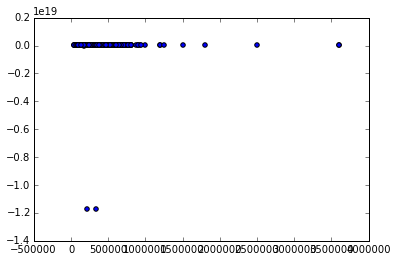

In [49]:
%matplotlib inline
prs  = nmdl.predict(unseen_x)
print prs.min()
plt.scatter(bench.Salary_x, bench.Salary_y)
# plt.xlim(0,1000000)
# plt.ylim(0,1000000)

In [26]:
unseen = pd.read_csv('ameo_numerical_test.csv')
unseen.Domain = unseen.Domain.fillna(unseen.Domain.mean())

unseen_x = unseen[x_columns]

In [195]:
nmdl.n_votes

9

In [32]:
plt.show()

In [36]:
for seg in nmdl.segments_:
    print seg.y.mean()

319261.168385
301940.41868
304148.230088
326288.006757
301659.601526
315043.980209
291411.637931
305520.991401
313374.074074
318383.500557


In [37]:
nmdl.get_params()

{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'base_estimator__copy_X': True,
 'base_estimator__fit_intercept': True,
 'base_estimator__n_jobs': 1,
 'base_estimator__normalize': False,
 'crossover_func': <function deap.tools.crossover.cxTwoPoint>,
 'cxpb': 0.5,
 'indpb': 0.2,
 'init_sample_percentage': 1,
 'mutpb': 0.5,
 'n': 10,
 'n_population': 20,
 'n_votes': 10,
 'ngen': 100,
 'statistics': True,
 'test_size': 0.25,
 'tournsize': 3}